# Análise de Dados de RH

### Instalando e Carregando as Bibliotecas

**Instalando as Bibliotecas**

In [ ]:
!pip install missingno
!pip install category_encoders
!pip install plotly

**Importando as Bibliotecas**

In [2]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

# Estatística
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Engenhária de atributos
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Ignore warning
import warnings
warnings.simplefilter("ignore")

### Importando os Dados

**Carregando os Dados**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Análise de Dados com Python - DSA/Projeto RH - Cap 02/Datasets/aug_train.csv')

**Informações Gerais Sobre os Dados**

In [4]:
# Tamanho atual do dataset
print(f'O dataset possui atualmente {df.shape[0]} linhas e {df.shape[1]} colunas.')

O dataset possui atualmente 19158 linhas e 14 colunas.


In [5]:
# Nome das colunas
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [6]:
# Primeiras linhas do dataframe
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [7]:
# Resumo das informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

### Análise Exploratória dos Dados

**Descrevendo variáveis categóricas**

In [8]:
df.describe(include = object)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


**Descrevendo variáveis numéricas**

* city_development_index: o índice de desenvolvimento médio é de 0.828848 e a mediana é 0.903000, com desvio padrão de 0.123; indicando que a maioria dos candidatos residem em cidades desenvolvidas.

* training_hours: a média de 65,365, mediana de 47 e máximo de 336; indica que a maioria dos candidatos gastam poucas horas para terminar o treinamento, mas alguns gastaram muito tempo para concluí-lo.

In [9]:
df.describe().drop(columns=['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


**Visualização dos Dados Categóricos**

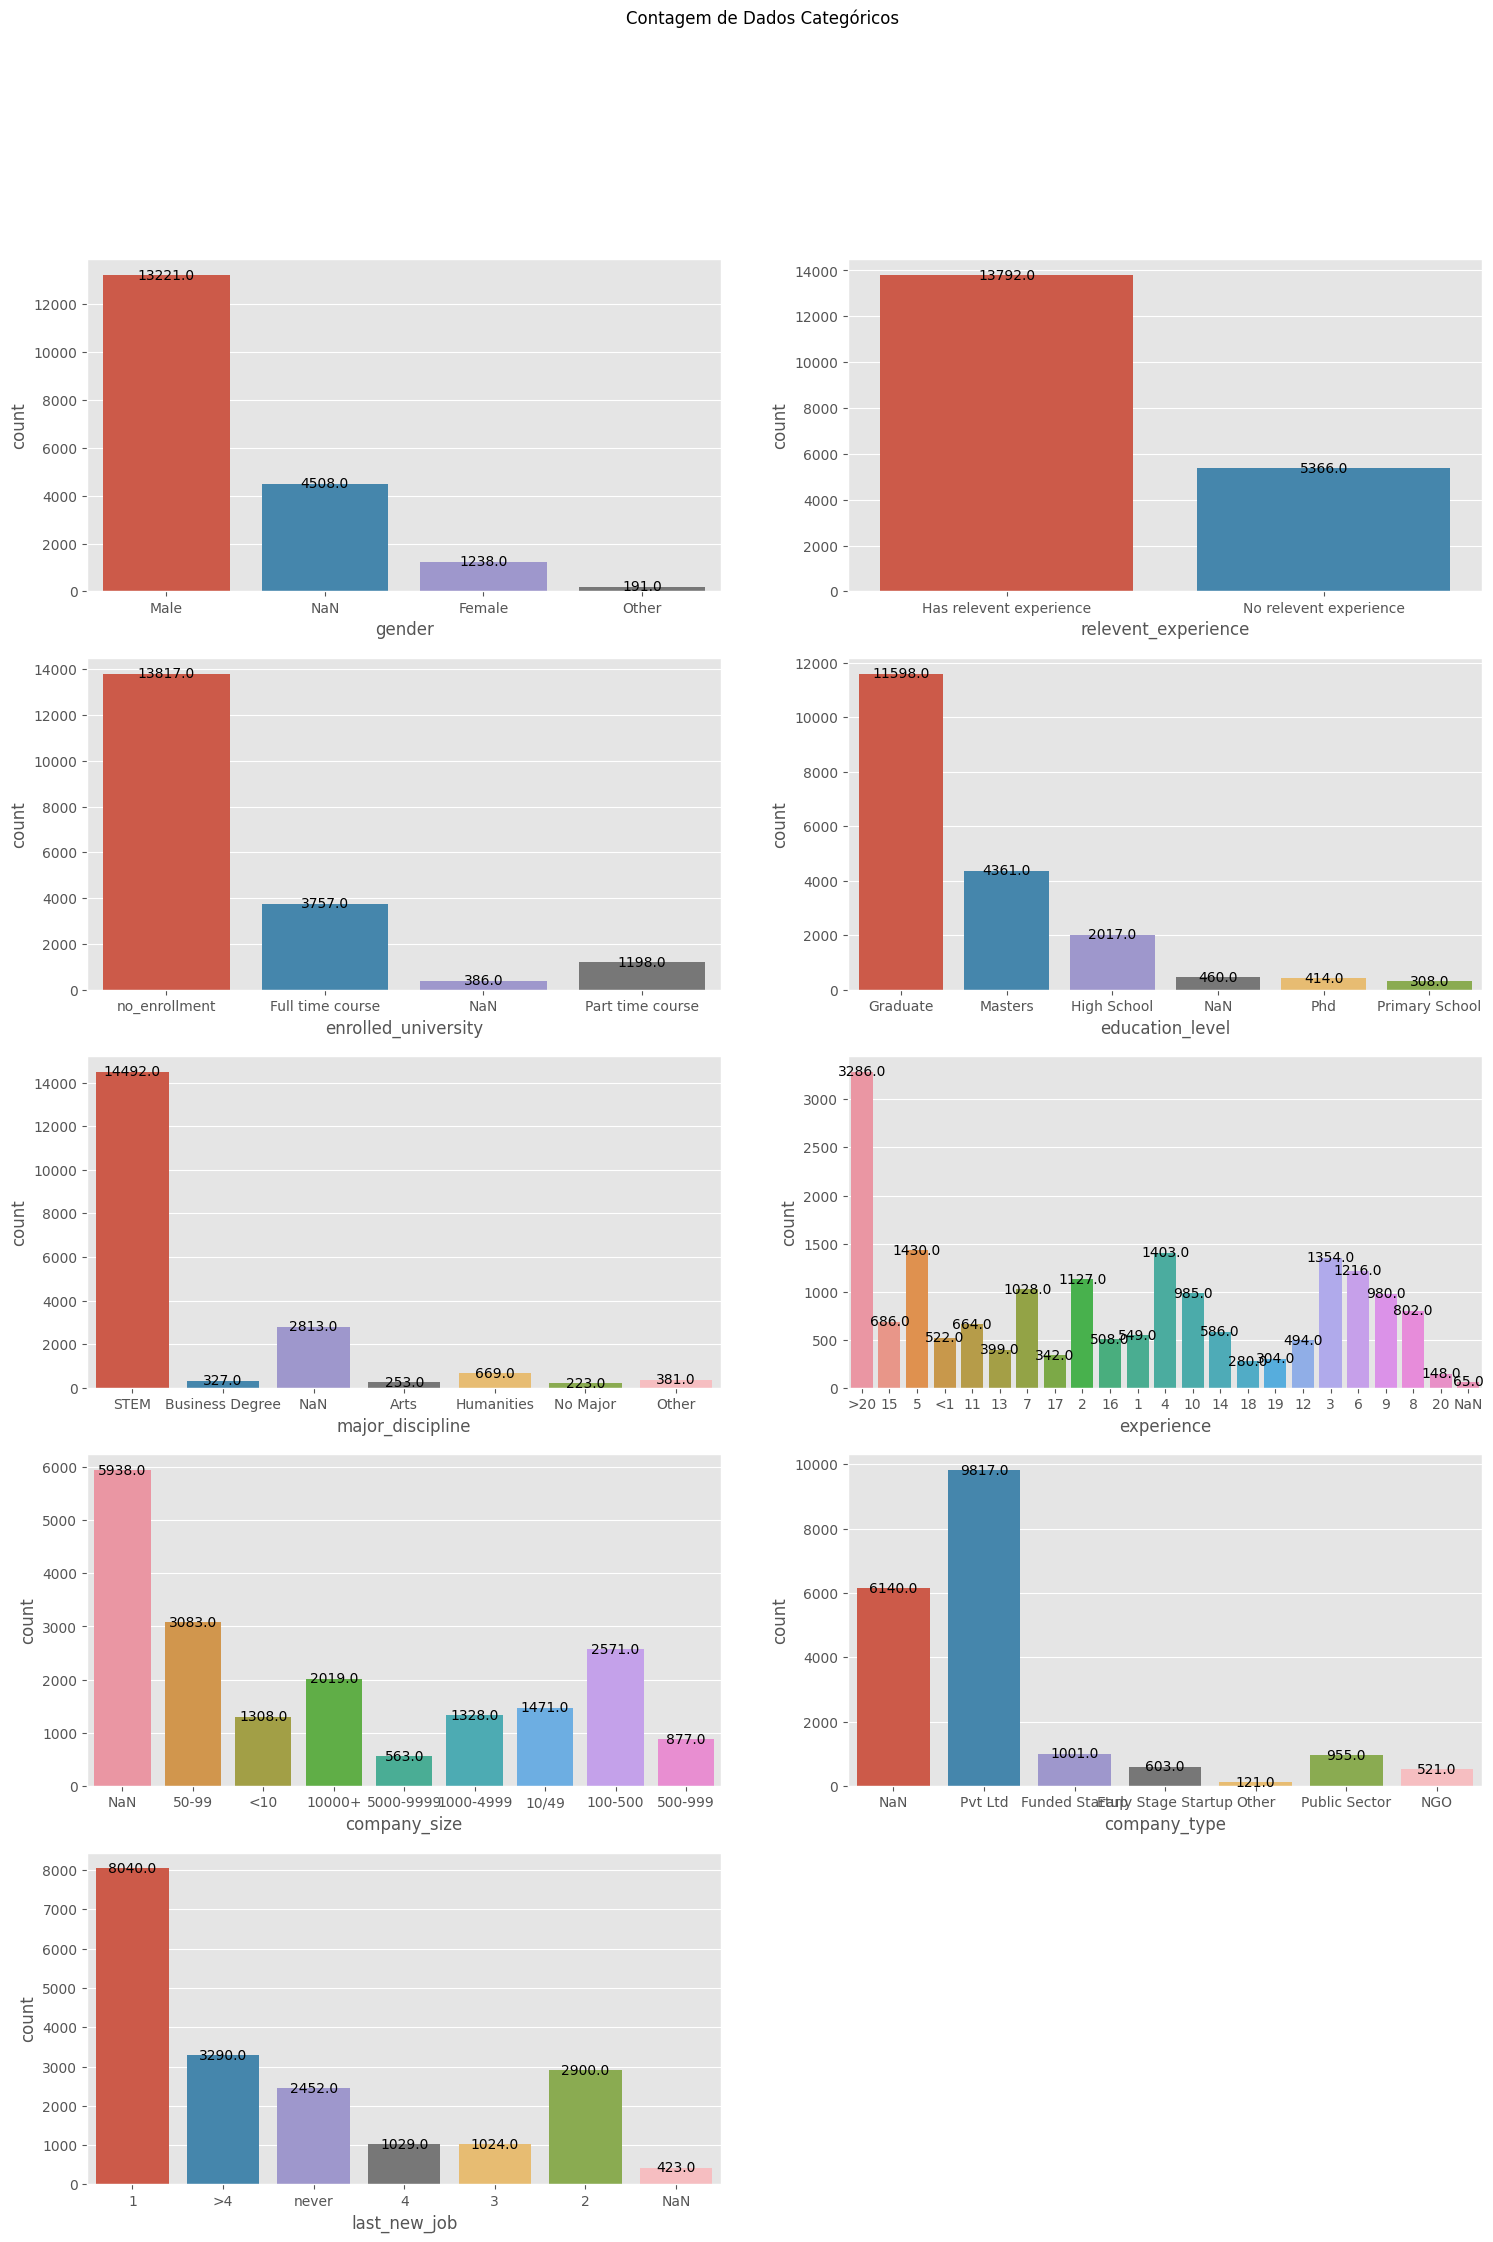

In [10]:
plt.figure(figsize=(18, 25))
plt.tight_layout(pad=0.5)

lista_categoricas = list(df.columns[3:12])
# df.select_dtypes(include=object).columns
for i, coluna in enumerate(lista_categoricas):
  plt.subplot(5, 2, i+1)
  sns.countplot(data=df.fillna('NaN'), x= coluna)
  plt.xlabel(coluna)

  for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center')

plt.suptitle('Contagem de Dados Categóricos')
plt.show()

**Vizualização dos Dados Numéricos**

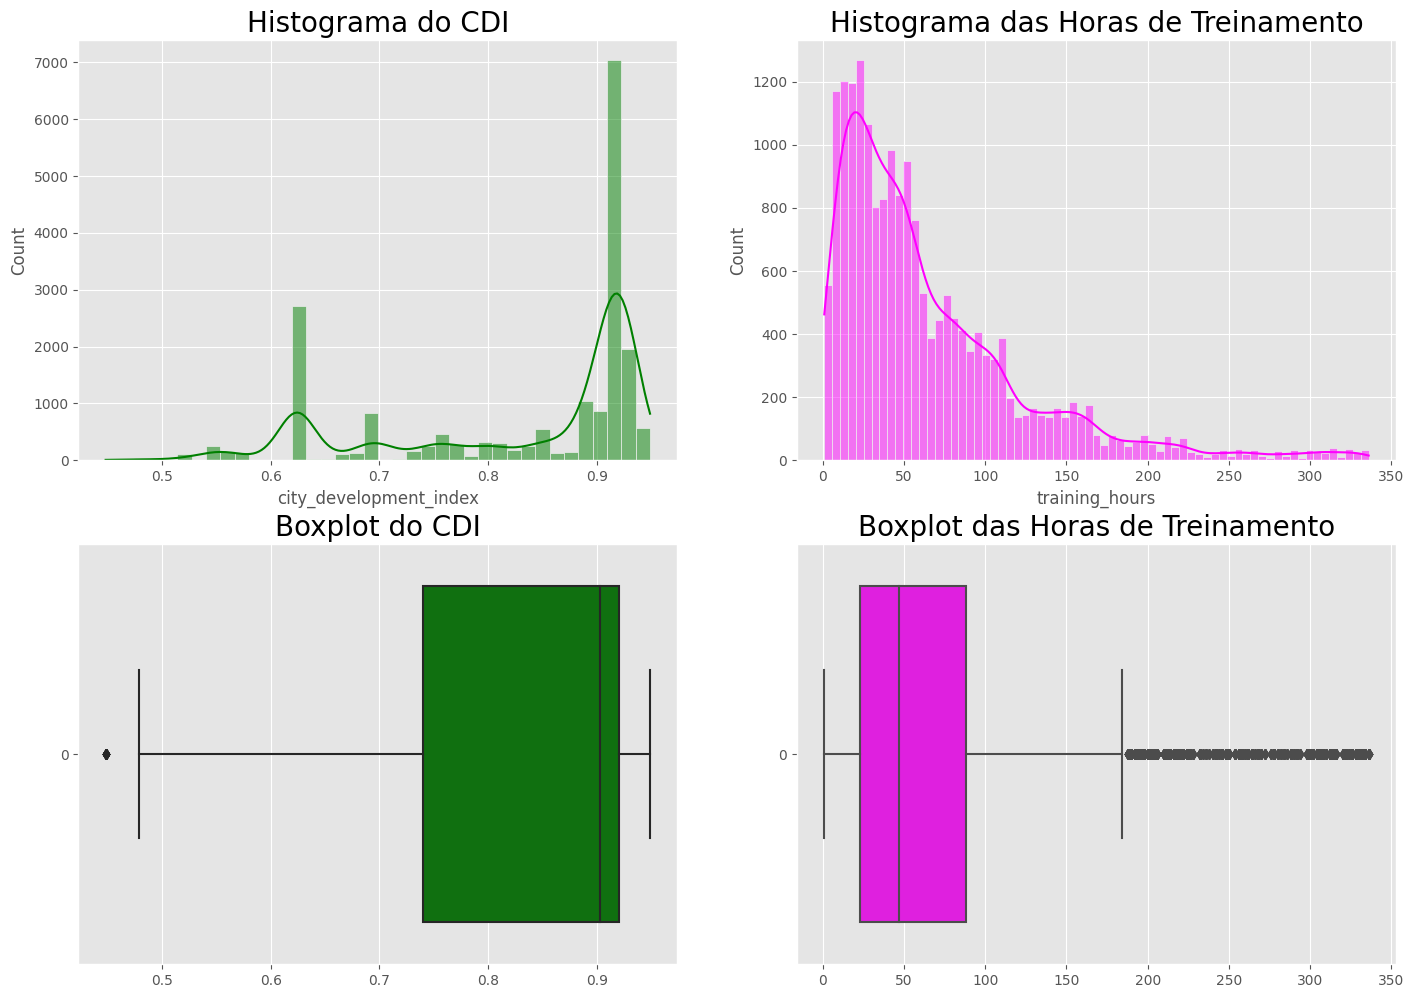

In [11]:
plt.figure(figsize=(17, 12))
plt.tight_layout(pad=0.5)
plt.subplot(221)
sns.color_palette('hls', 8)
sns.histplot(data=df['city_development_index'], kde=True, color='green')
plt.title('Histograma do CDI', fontsize=20)

plt.subplot(222)
sns.histplot(data=df['training_hours'], kde=True, color='magenta')
plt.title('Histograma das Horas de Treinamento', fontsize=20)

plt.subplot(223)
sns.boxplot(data=df['city_development_index'], orient='h', color='green')
plt.title('Boxplot do CDI', fontsize=20)

plt.subplot(224)
sns.boxplot(data=df['training_hours'], orient='h', color='magenta')
plt.title('Boxplot das Horas de Treinamento', fontsize=20)
plt.show()

**Teste de Normalidade Para as Variáveis Numéricas**

In [12]:
variaveis_numericas = ['city_development_index', 'training_hours']

for i in variaveis_numericas:
  stats, pval = normaltest(df[i])
  if pval > 0.05:
    print(i,': Distribuição Normal')
  else:
    print(i,': Distribuição Não Normal')

city_development_index : Distribuição Não Normal
training_hours : Distribuição Não Normal


**Correlação Entre as Variáveis Numéricas**

* Análise da correlação entre as variáveis numéricas e entre as variáveis numéricas e as variável alvo (target)

In [13]:
# Cópia do dataframe original
df_numerico = df.copy()

In [14]:
# Contagem de elemento únicos para a variável experience
df_numerico['experience'].value_counts(dropna=False)

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
NaN      65
Name: experience, dtype: int64

In [15]:
# Convertendo a variável experience para numérica
df_numerico['experience'] = np.where(df_numerico['experience'] == '<1', 1, df_numerico['experience'])
df_numerico['experience'] = np.where(df_numerico['experience'] == '>20', 21, df_numerico['experience'])
df_numerico['experience'] = df_numerico['experience'].astype(float)

In [16]:
# Conferindo o resultado da transformação
df_numerico['experience'].value_counts(dropna=False)

21.0    3286
5.0     1430
4.0     1403
3.0     1354
6.0     1216
2.0     1127
1.0     1071
7.0     1028
10.0     985
9.0      980
8.0      802
15.0     686
11.0     664
14.0     586
16.0     508
12.0     494
13.0     399
17.0     342
19.0     304
18.0     280
20.0     148
NaN       65
Name: experience, dtype: int64

In [17]:
# Contando valores únicos na variável last_new_job
df_numerico['last_new_job'].value_counts(dropna=False)

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
NaN       423
Name: last_new_job, dtype: int64

In [18]:
# Convertendo a variável last_new_job para numérica
df_numerico['last_new_job'] = np.where(df_numerico['last_new_job'] == '>4', 5, df_numerico['last_new_job'])
df_numerico['last_new_job'] = np.where(df_numerico['last_new_job'] == 'never', 0, df_numerico['last_new_job'])
df_numerico['last_new_job'] = df_numerico['last_new_job'].astype(float)

* A maior correlação entre variáveis é entre last_new_job e experience (0.473284). As variáveis city_development_index e experience possuem correlação de 0.300997, que é considerada fraca, mas pode ser útil. As demais correlações são insignificantes.

In [19]:
# Calculando a correlação com o coeficiente de spearman
df_numerico.drop(columns='enrollee_id').corr('spearman')

,city_development_index,experience,last_new_job,training_hours,target
city_development_index,1.000000,0.300997,0.182698,0.007491,-0.279165
experience,0.300997,1.000000,0.473284,0.003569,-0.183721
last_new_job,0.182698,0.473284,1.000000,0.002959,-0.082045
training_hours,0.007491,0.003569,0.002959,1.000000,-0.014126
target,-0.279165,-0.183721,-0.082045,-0.014126,1.000000


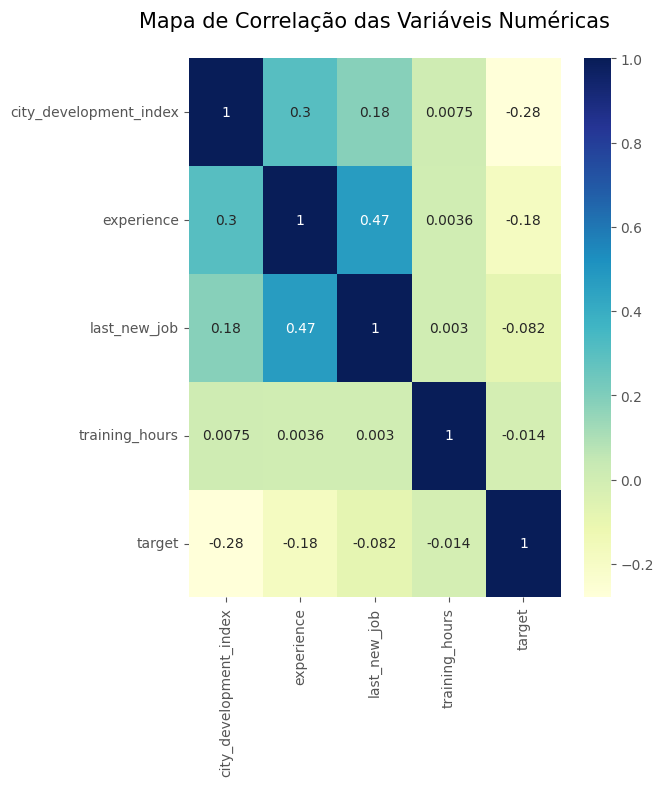

In [20]:
# Heatmap
plt.figure(figsize=(6, 7))
sns.heatmap(data=df_numerico.drop(columns='enrollee_id').corr('spearman'), annot=True, cmap='YlGnBu')
plt.title('Mapa de Correlação das Variáveis Numéricas\n', fontsize=15)
plt.show()

**Correlação Entre Variáveis Categóricas**

* Avaliando o Weight of Evidence (WOE) e Information Value (IV)

In [21]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [22]:
# Criando um loop para calcular
for i in df.drop(columns=['target',
                          'enrollee_id',
                          'city',
                          'city_development_index',
                          'training_hours',
                          'experience',
                          'last_new_job',
                          'company_size']).columns:
  df_woe_iv = (pd.crosstab(df[i], df['target'], normalize='columns')).assign(woe = lambda dfx: np.log(dfx[1] / dfx[0])).assign(iv = lambda dfx: np.sum(dfx['woe'] * (dfx[1] - dfx[0])))
  print(df_woe_iv, '\n______________________________________________________________________________________________________')

target      0.0       1.0       woe        iv
gender                                       
Female  0.08098  0.096222  0.172452  0.003337
Male    0.90650  0.889020 -0.019471  0.003337
Other   0.01252  0.014758  0.164458  0.003337 
______________________________________________________________________________________________________
target                        0.0       1.0       woe        iv
relevent_experience                                            
Has relevent experience  0.753147  0.619845 -0.194790  0.083523
No relevent experience   0.246853  0.380155  0.431784  0.083523 
______________________________________________________________________________________________________
target                    0.0       1.0       woe        iv
enrolled_university                                        
Full time course     0.164754  0.307477  0.623947  0.118886
Part time course     0.063465  0.064890  0.022210  0.118886
no_enrollment        0.771781  0.627632 -0.206746  0.118886 
_____

* As variáveis categóricas que possuem as maiores correlações com a target são enrolled_university, relevente_experience e education_level.

<Figure size 1000x1200 with 0 Axes>

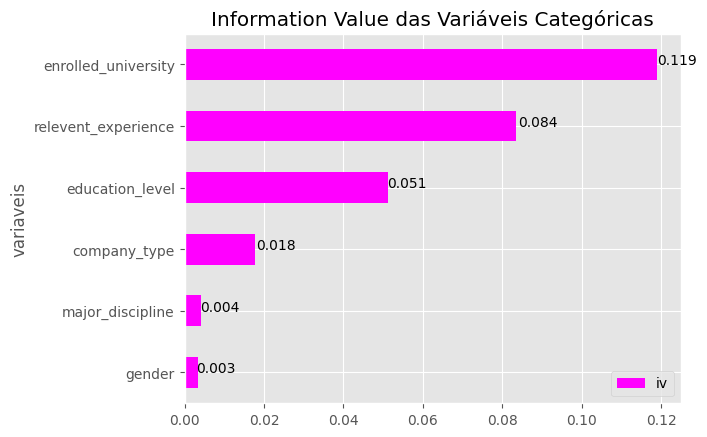

In [23]:
# Plot do Information Value

# Variáveis categóricas
columns_cat = df.drop(columns = ['target',
                                 'enrollee_id',
                                 'city',
                                 'city_development_index',
                                 'training_hours',
                                 'experience',
                                 'last_new_job',
                                 'company_size']).columns

# Lista para o IV
iv = []

# Loop
for i in columns_cat:
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                 .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0]))))
    iv.append(df_woe_iv['iv'][0])

# Dataframe
df_iv = pd.DataFrame({'variaveis':columns_cat,'iv':iv}).set_index('variaveis').sort_values(by = 'iv')

# Plot
# Figura
plt.figure(figsize = (10,12))
df_iv.plot(kind = 'barh', title = 'Information Value das Variáveis Categóricas', color ='magenta')
for index, value in enumerate(list(round(df_iv["iv"],3))):
    plt.text((value), index, str(value))
plt.legend(loc  = "lower right")
plt.show()

**Identificando Valores Ausentes e Duplicados**

In [24]:
df_null = df.isna().sum().sort_values(ascending=False).reset_index()
df.null = df_null.columns = ['variavel', 'valores_ausentes']

In [25]:
df_null

,variavel,valores_ausentes
0,company_type,6140
1,company_size,5938
2,gender,4508
3,major_discipline,2813
4,education_level,460
5,last_new_job,423
6,enrolled_university,386
7,experience,65
8,enrollee_id,0
9,city,0


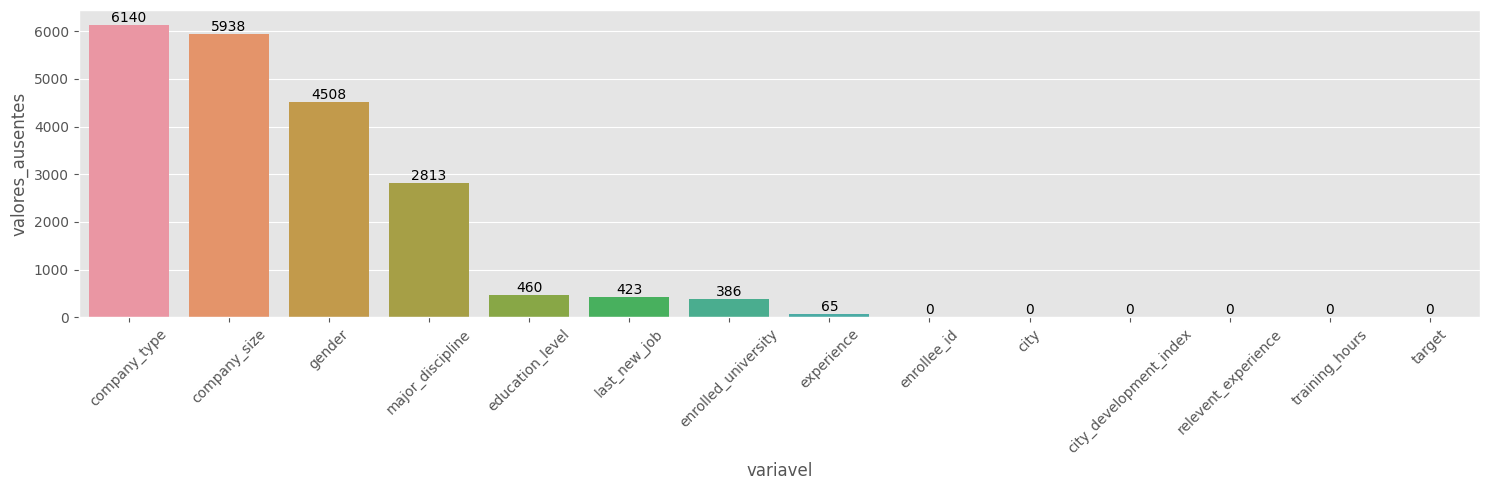

In [26]:
plt.figure(figsize=(15,5))
sns.barplot(data=df_null, x='variavel', y='valores_ausentes')
plt.xticks(rotation=45)
for index, value in enumerate(df_null['valores_ausentes']):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Criando Um Mapa de Valores Ausentes**

<Figure size 1000x500 with 0 Axes>

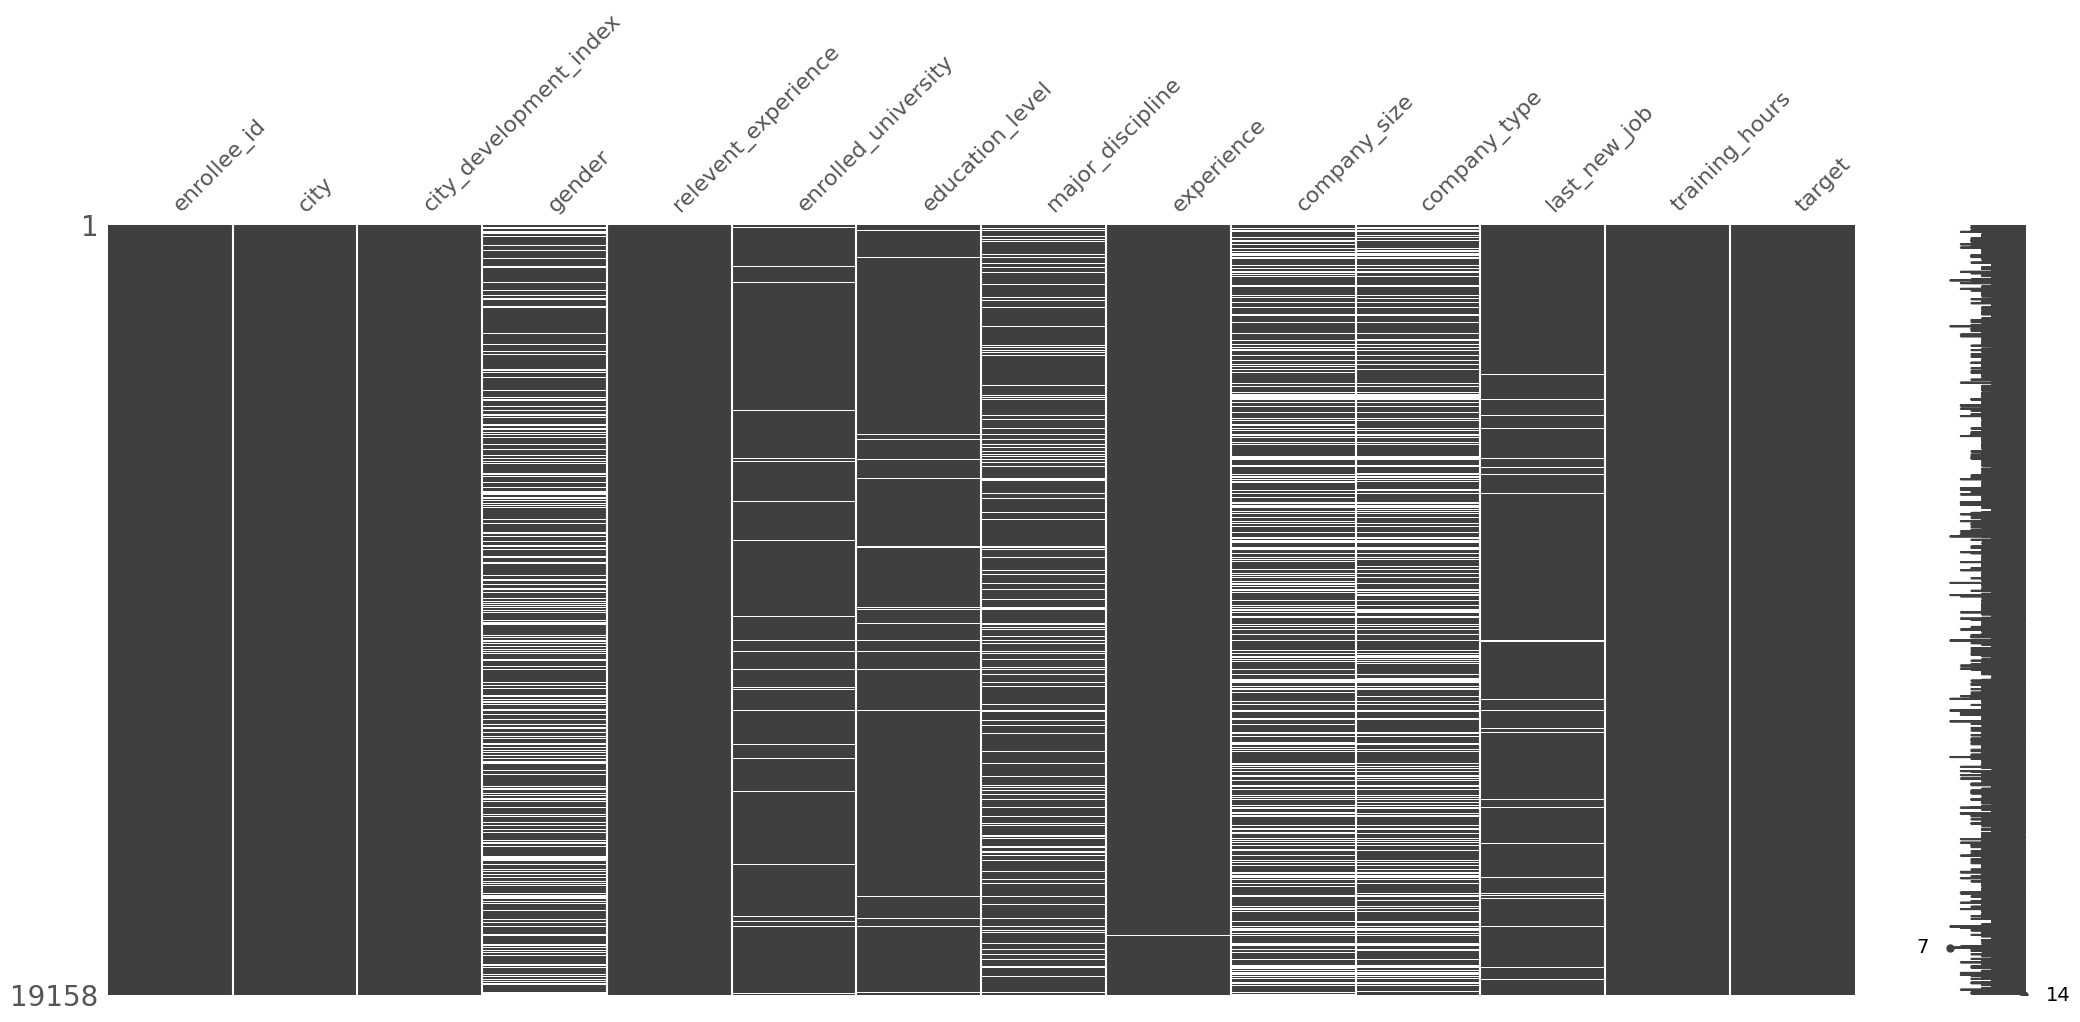

In [27]:
plt.figure(figsize=(10,5))
missingno.matrix(df)
plt.show()

**Verificando Valores Duplicados**

In [28]:
df['enrollee_id'].duplicated().sum()

0

**Verificando o Balanceamento da Variável target**

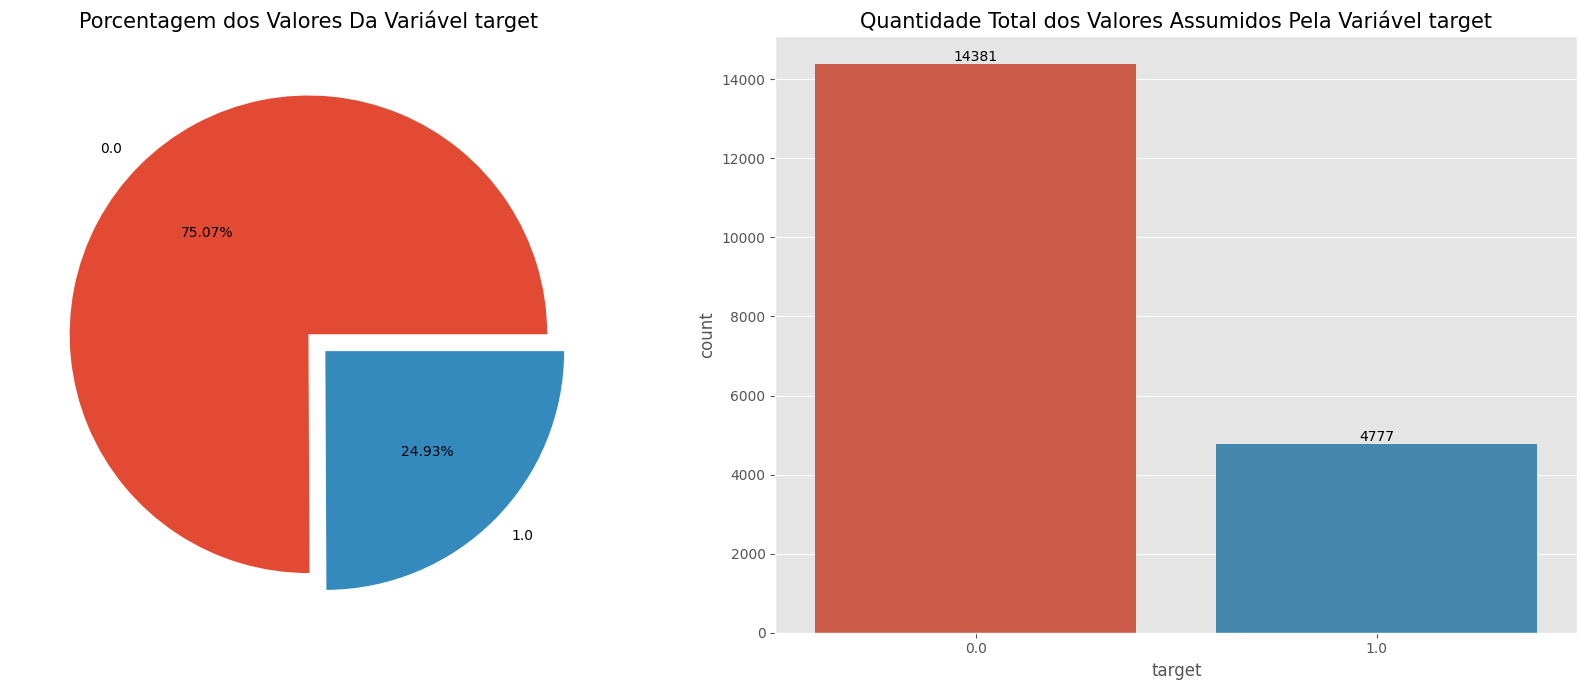

In [29]:
plt.figure(figsize=(17, 7))
plt.subplot(121)
plt.pie(round(df['target'].value_counts() / len(df) * 100, 2),
        labels=list(df['target'].value_counts().index),
        autopct="%.2f%%",
        explode=(0, 0.1))
plt.title('Porcentagem dos Valores Da Variável target', fontsize=15)

plt.subplot(122)
sns.countplot(data=df, x='target')
for index, valor in enumerate(df['target'].value_counts()):
  plt.text(index, valor, str(valor), ha='center', va='bottom')
plt.title('Quantidade Total dos Valores Assumidos Pela Variável target', fontsize=15)

plt.subplots_adjust(bottom=0.1)
plt.tight_layout()
plt.show()

### Limpeza e Processamento dos Dados

**Tratando Dados Ausentes**

In [30]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [31]:
# Variáveis que serão mantidas no dataframe
colunas_utilizadas = ['city_development_index',
                      'experience',
                      'enrolled_university',
                      'relevent_experience',
                      'education_level',
                      'company_type',
                      'major_discipline',
                      'target']

In [32]:
# dataframe apenas com as colunas utilizadas
df_final = df[colunas_utilizadas]

In [33]:
df_final.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.920,>20,no_enrollment,Has relevent experience,Graduate,NaN,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,NaN,STEM,0.0
3,0.789,<1,NaN,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


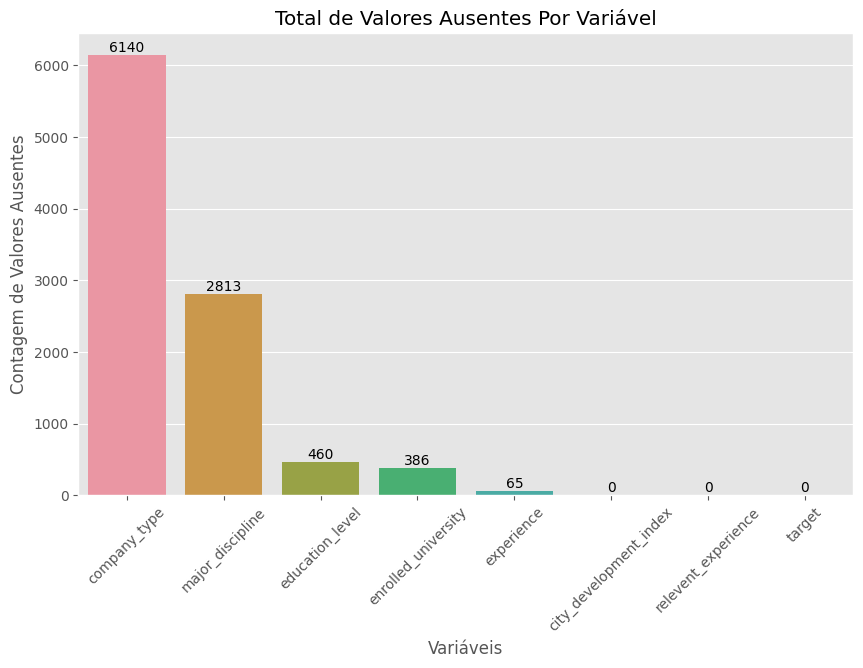

In [34]:
# Vizualizando valores ausentes para o df_final
df_null = df_final.isna().sum().sort_values(ascending=False).reset_index()
df_null.columns = ['variaveis', 'valores_ausentes']

plt.figure(figsize=(10,6))
sns.barplot(data=df_null, y='valores_ausentes', x='variaveis')
plt.xlabel('Variáveis')
plt.ylabel('Contagem de Valores Ausentes')
plt.title('Total de Valores Ausentes Por Variável')
plt.xticks(rotation=45)

for index, valor in enumerate(df_null['valores_ausentes']):
  plt.text(index, valor, str(valor), ha='center', va='bottom')

plt.show()

**Variável major_discipline**

Contagem dos valores ausentes

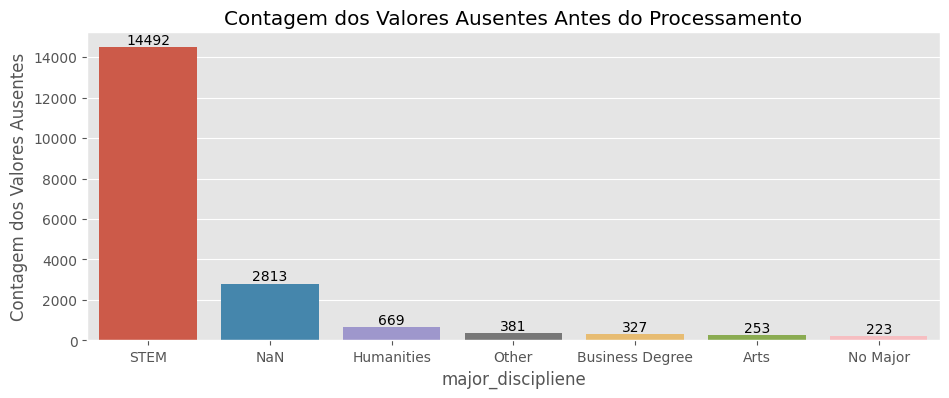

In [35]:
# Plotando grafico para contagem dos valores ausentes
plt.figure(figsize=(11, 4))
sns.barplot(data=df_final['major_discipline'].fillna('NaN').value_counts().sort_values(ascending=False).reset_index(), y='major_discipline', x='index')
plt.title('Contagem dos Valores Ausentes Antes do Processamento')
plt.xlabel('major_discipliene')
plt.ylabel('Contagem dos Valores Ausentes')

for index, valor in enumerate(df_final['major_discipline'].fillna('NaN').value_counts().sort_values(ascending=False).reset_index()['major_discipline']):
  plt.text(index, valor, str(valor), ha='center', va='bottom')

plt.show()

Relação entre os valores ausentes da major_discipline e a variável education_level

In [36]:
print(f"Total de valores ausentes em major_discipline: {df_final['major_discipline'].isna().sum()}")
print("Proporção de valores ausentes em education_level:\n ")
df_final[df_final['major_discipline'].isna()]['education_level'].value_counts(dropna=False)

Total de valores ausentes em major_discipline: 2813
Proporção de valores ausentes em education_level:
 


High School       2017
NaN                460
Primary School     308
Graduate            22
Masters              6
Name: education_level, dtype: int64

Criando um filtro para preencher os valores ausentes

In [37]:
nan_index_major_discipline = df_final[(df_final['major_discipline'].isna()) & ((df_final['education_level'] == 'High School') | (df_final['education_level'] == 'Primary School') | (df_final['education_level'].isna()))].index

In [38]:
nan_index_major_discipline

Int64Index([    6,    10,    13,    14,    25,    28,    36,    39,    41,
               54,
            ...
            19101, 19102, 19115, 19118, 19123, 19134, 19140, 19142, 19156,
            19157],
           dtype='int64', length=2785)

Preenchendo os valores ausentes com o filtro

In [39]:
df_final['major_discipline'][nan_index_major_discipline] = 'Non Degree'

Restante dos valores ausentes

In [40]:
df_final['major_discipline'].value_counts(dropna=False)

STEM               14492
Non Degree          2785
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
NaN                   28
Name: major_discipline, dtype: int64

Preenchendo o restante dos valores ausentes

In [41]:
df_final[df_final['major_discipline'].isna()] = 'Other'

In [42]:
df_final['major_discipline'].value_counts(dropna=False)

STEM               14492
Non Degree          2785
Humanities           669
Other                409
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

Plotando a variável major_discipline após o processamento dos valores ausentes


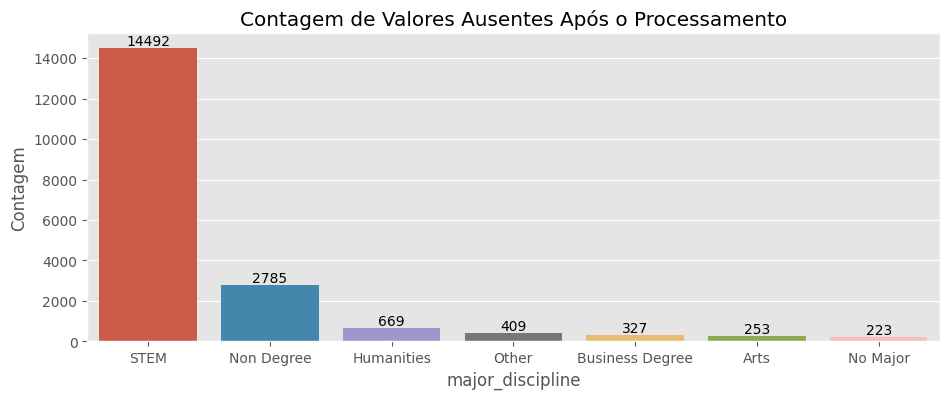

In [43]:
plt.figure(figsize=(11,4))
sns.barplot(data=df_final['major_discipline'].fillna('NaN').value_counts().sort_values(ascending=False).reset_index(), y='major_discipline', x='index')
plt.xlabel('major_discipline')
plt.ylabel('Contagem')
plt.title('Contagem de Valores Ausentes Após o Processamento')
for index, valor in enumerate(df_final['major_discipline'].fillna('NaN').value_counts().sort_values(ascending=False).reset_index()['major_discipline']):
  plt.text(index, valor, str(valor), ha='center', va='bottom')

plt.show()

**Variável enrolled_university**

Valores ausentes da variável enrolled_id antes do processamento

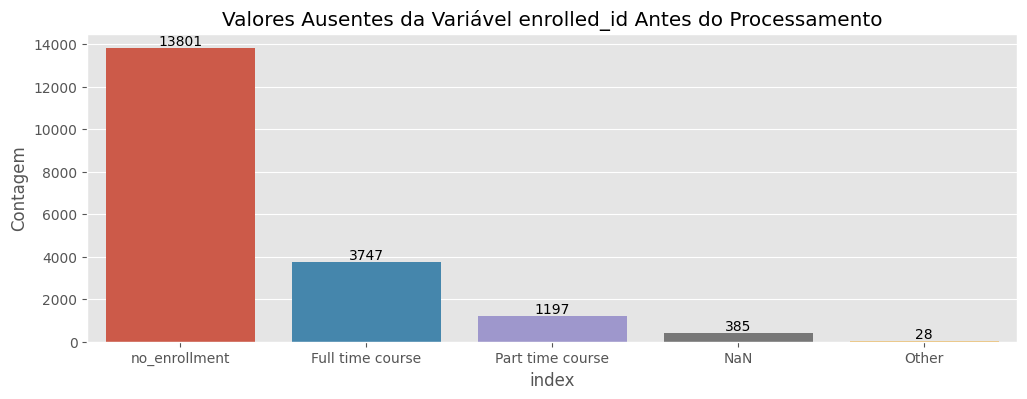

In [61]:
plt.figure(figsize=(12,4))
sns.barplot(data=df_final.fillna('NaN')['enrolled_university'].value_counts().reset_index(), y='enrolled_university', x='index')
plt.title('Valores Ausentes da Variável enrolled_id Antes do Processamento')
plt.ylabel('Contagem')

for index, valor in enumerate(df_final.fillna('NaN')['enrolled_university'].value_counts().reset_index()['enrolled_university']):
  plt.text(index, valor, str(valor), ha='center', va='bottom')
plt.show()

Relação entre os valores ausentes da enrolled_university e a variável education_level

* Candidatos que tem seu education_level como Primary School não estão habilitados para entrar na universidade. Nesse caso, valores ausentes em enrroled_university correspondentes a Primary School em education level serão preeenchidos com Primary Grad.

In [68]:
print(f"O total de valores ausentes em enrolled_university é: {df_final['enrolled_university'].isna().sum()}")
print(f"Proporção de valores ausentes na variável education_level:\n")
df_final[df_final['enrolled_university'].isna()]['education_level'].value_counts()

O total de valores ausentes em enrolled_university é: 385
Proporção de valores ausentes na variável education_level:



Graduate          170
Masters            53
High School        47
Primary School      9
Phd                 6
Name: education_level, dtype: int64

Criando regra para preenchimento dos valores ausentes

In [70]:
nan_index_enrolled_university = df_final[(df_final['enrolled_university'].isna()) & (df_final['education_level'] == 'Primary School')].index

In [72]:
len(nan_index_enrolled_university)

9

Preenchendo valores ausentes com base no filtro

In [73]:
df_final['enrolled_university'][nan_index_enrolled_university] = 'Primary Grad'

In [74]:
print(f"O total de valores ausentes em enrolled_university é: {df_final['enrolled_university'].isna().sum()}")
print(f"Proporção de valores ausentes na variável education_level:\n")
df_final[df_final['enrolled_university'].isna()]['education_level'].value_counts()

O total de valores ausentes em enrolled_university é: 376
Proporção de valores ausentes na variável education_level:



Graduate       170
Masters         53
High School     47
Phd              6
Name: education_level, dtype: int64

Preenchendo os valores ausentes restantes com Other

* Os valores ausentes que restaram não possuem um critério para serem preenchidos, então serão inmputados com Other

In [77]:
df_final[df_final['enrolled_university'].isna()] = 'Other'

Valores ausentes da variável enrolled_id após do processamento

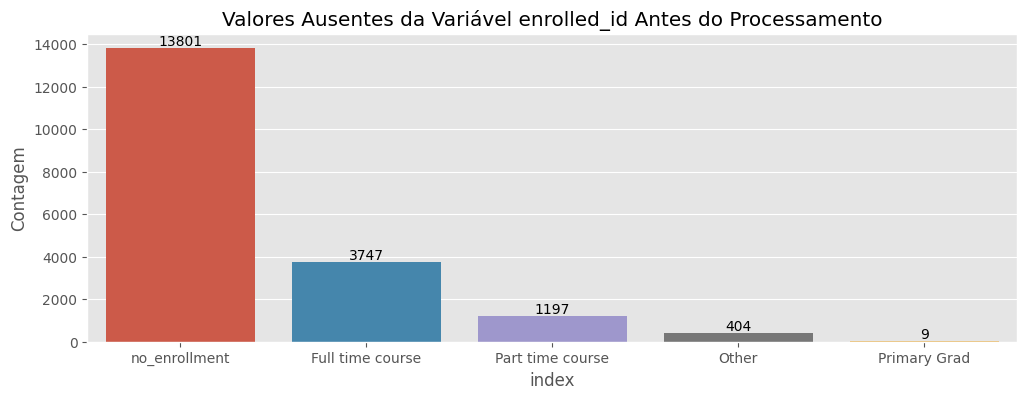

In [78]:
plt.figure(figsize=(12,4))
sns.barplot(data=df_final.fillna('NaN')['enrolled_university'].value_counts().reset_index(), y='enrolled_university', x='index')
plt.title('Valores Ausentes da Variável enrolled_id Antes do Processamento')
plt.ylabel('Contagem')

for index, valor in enumerate(df_final.fillna('NaN')['enrolled_university'].value_counts().reset_index()['enrolled_university']):
  plt.text(index, valor, str(valor), ha='center', va='bottom')
plt.show()